In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

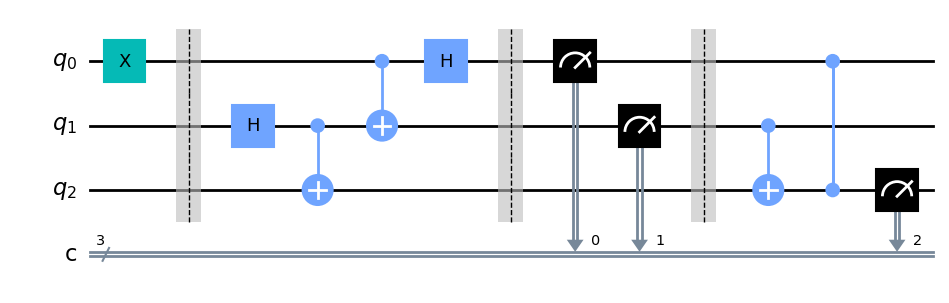

In [10]:
from qiskit import *
from qiskit_aer import AerSimulator
from numpy import pi
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw('mpl')

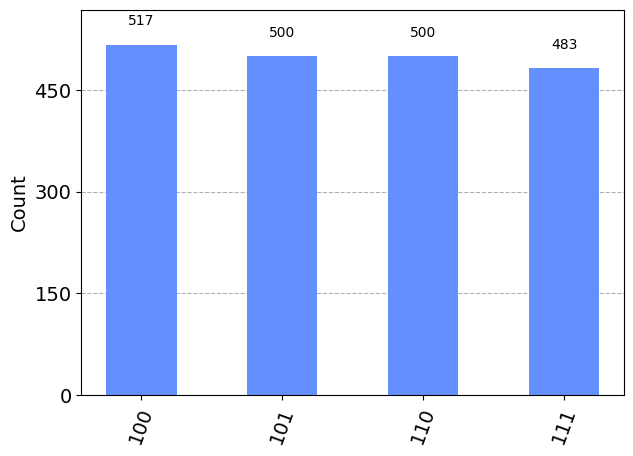

In [14]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit, shots='2000').result()
counts = result.get_counts()
plot_histogram(counts)